# Неделя 2. Четверг

## Линейная регрессия

* Ваша задача сегодня для лучшего понимания алгоритмов машинного обучения, реализовать свой класс Линейной регрессии на Python и `numpy` в частности.  

* на _train_ выборке алгоритму необходиму оубчиться, на _test_ выборке проверить свой результат. Метрика для проверки результата для линейной регрессии - _MSE_, метрики реализовать внутри класса.

* В качестве функции потерь, необходимо выбрать _MSE_ - для линейной регрессии. 

* Также необходиму пользователю Вашей модели предоставить возможность указать регуляризирующие коэффициенты и вид регуляризации('Ridge', 'Lasso', 'ElasticNet').  

* При инициализации класса пользователь указывает вид регуляризации, и коэффициенты регуляризации. Если вид не указан регуляризация отсутствует  


* После вы можете сравнить свой результат со стандартной Линейной регрессией, реализованной в _sklearn_

In [16]:
#Подгрузите необходимые библиотеки
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

ss = StandardScaler()

In [78]:
train = pd.read_csv('aux/train_flats.csv')
test = pd.read_csv('aux/test_flats.csv')

* __m2__ - площадь объекта (фича)
* __dist__ - удаленность объекта от центра города(фича)
* __price__ - цена (таргет)

0. Отнормируйте свои данные, используя [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Для линейных алгоритмов это очень важно  

In [79]:
# your code
X = ss.fit_transform(train[['m2', 'dist']].to_numpy())
y = np.array(train[['price']]).ravel()

X_test = ss.fit_transform(test[['m2', 'dist']].to_numpy())
y_test = np.array(test[['price']]).ravel()

MSELoss = $\dfrac{1}{N} \sum_{i=1}^{N}(y_{act} - y_{pred})^2 = \dfrac{1}{N} \sum_{i=1}^{N}(y_{act} - (\omega_0 + x_{i1} \cdot \omega_1 + x_{i2} \cdot \omega_2 + ... + x_{in} \cdot \omega_n))^2$ 

*  Возьмем функцию потерь на одном объекте

$L = (y_{act} - y_{pred})^2$  
  
$y_{act} - $ реальное значение, которое принимает наша величина

$y_{pred} - $ значение, которое будет предсказывать наша модель


Наше желание, чтобы модель, на каждом элементе выборки предсказывала значение как можно ближе к реальному

* Как это сделать?

Мы знаем, что в случае линейной регрессии наше предсказание строится как  

$y_{pred} = (\omega_0 + x_{1} \cdot \omega_1 + x_{2} \cdot \omega_2 + ... + x_{n} \cdot \omega_n)$  

$w_0, w_1, w_2, ..., w_n$ - Параметры, которые мы могли бы настроить!  

Итоговая функция потерь на одном объекте:

$L(\vec{w}) = (y_{act} - (\omega_0 + x_{i1} \cdot \omega_1 + x_{i2} \cdot \omega_2 + ... + x_{in} \cdot \omega_n))^2$

$L(\vec{w})$ - сложная функция, которая состоит из следующих функциональных преобразований:  
* возведения в квадрат
* домножения наших $\omega$ на константу - входные данные $x_1, x_2, ..., x_n$. Да да, именно они являются константами

(_Смотреть выше расписанную формулу_)



1. Посчитать для $L(\vec{w}) = (y_{act} - (\omega_0 + x_{i1} \cdot \omega_1 + x_{i2} \cdot \omega_2 + ... + x_{in} \cdot \omega_n))^2$ сложную частную производную по $w_1$.

Как будет отличаться частная производная для $w_2, w_3, ..., w_n$?

$L(\vec{w}_{i}) = -2 * (y_{act} - y_{pred}) * x_{i}$

2. Посчитать частную производную для $w_0$. (Свободного члена)

$L(\vec{w}_{0}) = -2 * (y_{act} - y_{pred})$

Математически градиент готов, останется обернуть его в алгоритм градиентного спуска и на реальных данных, где у нас ни один объект, а много сразу.
Единственной разницей того, что объектов много сразу, мы будем минимизировать функцию потерь в среднем на всех элементах.

Формула для одного объекта была бы такой:
    
$\vec{w_{new}} = \vec{w_{old}} - lr * grad L(\vec{w_{old}})$  

Для всех объектов: 

1. Высчитывается градиент на каждом из ваших объектов(везде получаются разные $grad L(\vec{w_{old}})$ - так как у каждого объекта свои $y, x_1, x_2, ...$).
2. Берется средний $\vec{\omega_{old}}$ - по нему вычисляется новый $\vec{w_{new}}$ у модели

Итого:

$\vec{w_{new}} = \vec{w_{old}} - lr * mean(grad L(\vec{w_{old}}))$

3. Создать класс LinReg. При инициализации дать возможность указать learning_rate, кол-во входных фичей(n). Записать эту информацию в атрибуты класса

In [ ]:
# class LinReg:
#     def __init__(self, learning_rate, n_inputs):
#         self.learning_rate = ...
#         self.n_inputs = ...

class LinReg:
    def __init__(self, learning_rate, n_inputs):
        self.learning_rate = learning_rate
        self.n_inputs = n_inputs

5


4. Создать случайную инициализцию необходимых $\omega$ (Их будет n+1). Инициализируйте их равномерным распределением w1, w2, ..., wn = положите в атрибут - coef_, w0(свободный член) положите в атрибут intercept_

In [1]:
# class LinReg:
#     def __init__(self, learning_rate, n_inputs):
#         self.learning_rate = ...
#         self.n_inputs = ...
#         self.coef_ = ...
#         self.intercept_ = ...

class LinReg:
    def __init__(self, learning_rate, n_inputs):
        self.learning_rate = learning_rate
        self.n_inputs = n_inputs
        self.coef_ = np.random.uniform(-1, 1, size=n_inputs + 1)
        self.intercept_ = np.random.uniform(-1, 1)

5. Опишите метод fit, который будет принимать на вход X, y (X - данные x1, x2, ..., xn, y - это $y_{act})$ и высчитывать с помощью градиентного спуска самые оптимальные параметры w0, w1, w2, ..., wn. Которые будут хранится в атрибутах coef_ и intercept_

In [2]:
# class LinReg:
#     def __init__(self, learning_rate, n_inputs):
#         self.learning_rate = ...
#         self.n_inputs = ...
#         self.coef_ = ...
#         self.intercept_ = ...
class LinReg:
    def __init__(self, learning_rate, n_inputs):
        self.learning_rate = learning_rate
        self.n_inputs = n_inputs
        self.coef_ = np.random.uniform(-1, 1, size=n_inputs + 1)
        self.intercept_ = np.random.uniform(-1, 1)      
    def fit(self, X, y):
        n_size = X.shape[0]
        for _ in range(10):
            y_pred = np.dot(X, self.coef_) + self.intercept_
            error = y - y_pred
            grad_intercept = (-2 * np.sum(error)) / n_size
            grad_coef = (-2 * np.dot(X.T, error )) / n_size

            self.coef_ -= self.learning_rate * grad_coef
            self.intercept_ -= self.learning_rate * grad_intercept
        pass

6. Опишите метод predict, который будет предсказывать для новых точек в дальнейшем их y_pred

In [70]:
# class LinReg:
#     def __init__(self, learning_rate, n_inputs):
#         self.learning_rate = ...
#         self.n_inputs = ...
#         self.coef_ = ...
#         self.intercept_ = ...
        
#     def fit(self, X, y):
#         pass

class LinReg:
    def __init__(self, learning_rate, n_inputs):
        self.learning_rate = learning_rate
        self.n_inputs = n_inputs
        self.coef_ = np.random.uniform(-1, 1, size=n_inputs)
        self.intercept_ = np.random.uniform(-1, 1)       
    def fit(self, X, y):
        n_size = X.shape[0]
        for _ in range(50):
            y_pred = np.dot(X, self.coef_) + self.intercept_
            error = y - y_pred
            grad_intercept = (-2 * np.sum(error)) / n_size
            grad_coef = (-2 * np.dot(X.T, error )) / n_size

            self.coef_ -= self.learning_rate * grad_coef
            self.intercept_ -= self.learning_rate * grad_intercept

    def predict(self, X):
        y_pred = np.dot(X, self.coef_) + self.intercept_
        return y_pred
    
    def score(self, X, y):
         y_pred = self.predict(X)
         mse = np.mean((y - y_pred) ** 2)
         return mse

In [75]:
my_model = LinReg(learning_rate=0.1, n_inputs=X.shape[1])
my_model.fit(X, y)
my_coef = my_model.coef_
my_intercept = my_model.intercept_
mse = my_model.score(X, y)

7. Сравните результат с линейной регрессией в sklearn. 

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
sk_coef = lr.coef_
sk_intercept = lr.intercept_
mse_1 = lr.score(X, y)  

print("Коэффициенты (ваша модель):", my_coef)
print("Свободный член (ваша модель):", my_intercept)
print(f'Mean Squared Error my: {mse}')
print('--' * 10)
print("Коэффициенты (sklearn):", sk_coef)
print("Свободный член (sklearn):", sk_intercept)
print(f'Mean Squared Error sklearn: {mse}') 

Коэффициенты (ваша модель): [ 57457.07675628 -20267.29548318]
Свободный член (ваша модель): 80657.48460081809
Mean Squared Error my: 1699491456.0947819
--------------------
Коэффициенты (sklearn): [ 57459.36885842 -20265.12337312]
Свободный член (sklearn): 80658.63580246911
Mean Squared Error sklearn: 1699491456.0947819


8. Напшите метод _score_. Который принимает данные _X_ и _y_  и высчитывает функционал качества, можно оставить тот же [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). Он нам понадобится для оценки качества работы алгоритмы на тестовых данных

In [9]:
# class LinReg:
#     def __init__(self, learning_rate, n_inputs):
#         self.learning_rate = ...
#         self.n_inputs = ...
#         self.coef_ = ...
#         self.intercept_ = ...
        
#     def fit(self, X, y):
#         pass

#     def predict(self, X):
#         pass

#     def score(self, X, y):
#         pass

9. Посчитайте ваш _score_ и линейной регрессии из sklearn для тестового набора данных

In [80]:
my_model = LinReg(learning_rate=0.1, n_inputs=X.shape[1])
my_model.fit(X_test, y_test)
my_coef = my_model.coef_
my_intercept = my_model.intercept_
mse = my_model.score(X_test, y_test)

lr = LinearRegression()
lr.fit(X_test, y_test)
sk_coef = lr.coef_
sk_intercept = lr.intercept_
mse_1 = lr.score(X_test, y_test)  

print("Коэффициенты (ваша модель):", my_coef)
print("Свободный член (ваша модель):", my_intercept)
print(f'Mean Squared Error my: {mse}')
print('--' * 30)
print("Коэффициенты (sklearn):", sk_coef)
print("Свободный член (sklearn):", sk_intercept)
print(f'Mean Squared Error sklearn: {mse}') 

Коэффициенты (ваша модель): [ 84590.41609574 -15868.80211063]
Свободный член (ваша модель): 93266.71760395092
Mean Squared Error my: 3167737362.847254
------------------------------------------------------------
Коэффициенты (sklearn): [ 84622.44071836 -15836.79250271]
Свободный член (sklearn): 93268.0487804878
Mean Squared Error sklearn: 3167737362.847254


10. Нарисуйте 3D график, на котором будет следующее:

* ось X и Y - [['m2', 'dist']]
* ось Z -  price
* через scatter все элементы выборки. Красными точками train, Синими test
* Линейную плоскость предсказания

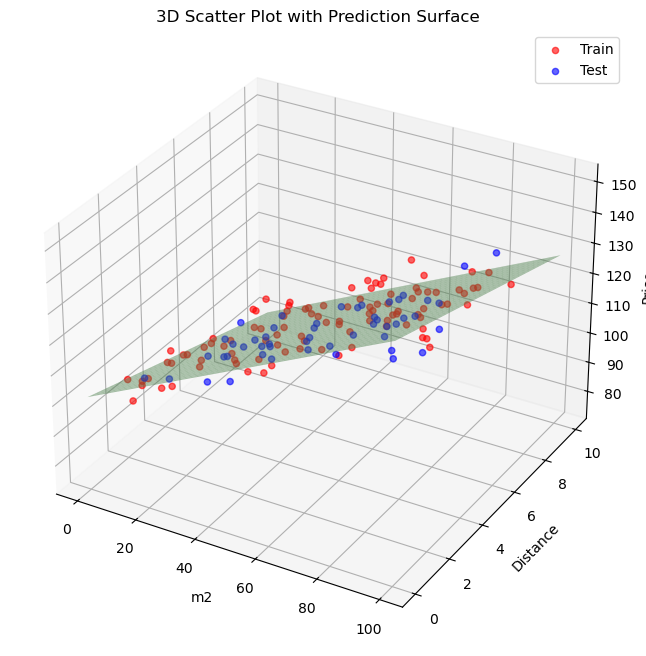

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Создание примера данных
np.random.seed(0)
n_train = 100
n_test = 50

# Пример тренировочных данных
m2_train = np.random.rand(n_train) * 100  # Площадь в м²
dist_train = np.random.rand(n_train) * 10  # Расстояние
price_train = 100 + (m2_train * 0.5) - (dist_train * 2) + np.random.normal(0, 5, n_train)  # Цены

# Пример тестовых данных
m2_test = np.random.rand(n_test) * 100
dist_test = np.random.rand(n_test) * 10
price_test = 100 + (m2_test * 0.5) - (dist_test * 2) + np.random.normal(0, 5, n_test)

# Объединение тренировочных и тестовых данных для создания DataFrame
train = pd.DataFrame({'m2': m2_train, 'dist': dist_train, 'price': price_train})
test = pd.DataFrame({'m2': m2_test, 'dist': dist_test, 'price': price_test})

# Подготовка данных для графика
X_train = train[['m2', 'dist']].to_numpy()
y_train = train['price'].to_numpy()
X_test = test[['m2', 'dist']].to_numpy()
y_test = test['price'].to_numpy()

# Обучение линейной модели
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Генерация плоскости предсказания
xx, yy = np.meshgrid(np.linspace(0, 100, 100), np.linspace(0, 10, 100))
zz = model.predict(np.column_stack((xx.ravel(), yy.ravel())))
zz = zz.reshape(xx.shape)

# Создание 3D графика
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Отображение тренировочных и тестовых точек
ax.scatter(train['m2'], train['dist'], train['price'], color='red', label='Train', alpha=0.6)
ax.scatter(test['m2'], test['dist'], test['price'], color='blue', label='Test', alpha=0.6)

# Отображение плоскости предсказания
ax.plot_surface(xx, yy, zz, color='lightgreen', alpha=0.5)

# Настройка осей
ax.set_xlabel('m2')
ax.set_ylabel('Distance')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot with Prediction Surface')
ax.legend()

plt.show()

10*. Добавьте возможность пользователю добавлять реугляризацию модели. Это не привносит больших изменений. Немного пмоеняется функция потерь и как следствие градиент

In [ ]:
# class LinReg:
#     def __init__(self, learning_rate, n_inputs, reg_type='Ridge', alpha=0.2):
#         self.learning_rate = ...
#         self.n_inputs = ...
#         self.coef_ = ...
#         self.intercept_ = ...
        
#     def fit(self, X, y):
#         pass

#     def predict(self, X):
#         pass